In [3]:
# check
from truthnet import load_veritas_model
M=load_veritas_model('./veritas_models/veritas_005_SUD.pkl.gz')
M

{'version': '0.0.1',
 'model': qnet.Qnet,
 'problem': '',
 'calibration_lower': array([0.68064352, 0.68064352, 0.68064352, ..., 0.63052135, 0.61121131,
        0.46794628]),
 'calibration_veritas': array([0.21498119, 0.21498119, 0.21498119, ..., 0.18910337, 0.25517241,
        0.21819346]),
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7ff7e6856aa0>,
 'LOWER_THRESHOLD': 0.39808233523721515,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7ff7e6857400>,
 'VERITAS_THRESHOLD': 0.3599903882097282}

In [8]:
def drop_empty_string_keys(input_dict):
    # Create a new dictionary, excluding keys with empty string values
    cleaned_dict = {key: value for key, value in input_dict.items() if value != ''}
    return cleaned_dict
import pandas as pd
import numpy as np
df=pd.read_csv('./data/SUD.csv',index_col=0,
            keep_default_na=False,dtype=str)
featurenames=M['model'].feature_names
training_index=M['model'].training_index
test_index=np.array([x for x in df.index.values if x not in training_index])
df_test=df.loc[test_index,:][featurenames]
D=df_test.T.to_dict()
D1={k:drop_empty_string_keys(v) for k,v in D.items()}
D=[{'SUB'+str(k):v} for k,v in D1.items()]

df_train=df.loc[training_index,:][featurenames]
Xt=df_train.values.astype(str)

In [9]:
from truthfinder import reveal
Rsud=reveal(D,M,perturb=0,model_path=False,score=False)

ckeck passed


In [67]:
res=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsud[0]}).T
res.columns=['lower_threshold','lower_p','veritas','veritas_p']
res=res.assign(score=res.lower_threshold)

In [80]:
C0=.3
C1=0.45
C2=1
def malinger(row):
    if (row.lower_threshold < C0):
        return -1
    if (row.veritas > C1) and (row.score > C2):
        return -1    
    if (row.score < C2):
        return 0
    else:
        return 1

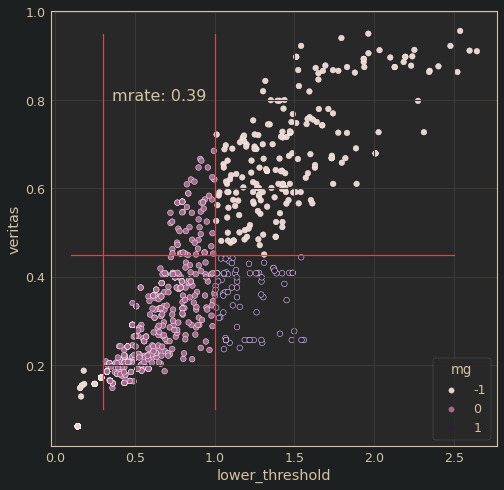

In [83]:
import pylab as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

res['mg']=res.apply(malinger,axis=1)
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=[8,8])
plt.subplot(111)
sns.scatterplot(data=res,x='lower_threshold',y='veritas',hue='mg')
plt.plot([.1,2.5],[C1,C1],'-r')
plt.plot([C0,C0],[.1,.95],'-r')
plt.plot([C2,C2],[.1,.95],'-r')

ax = plt.gca()
mrate=res[res.mg==-1].index.size/res.index.size
ax.text(0.65, 0.8, f'mrate: {mrate:.2f}', fontsize=16, ha='center')

plt.savefig('reportSUD.png',dpi=300,bbox_inches='tight',transparent=True)

In [84]:
res.mg.value_counts()

 0    458
-1    340
 1     77
Name: mg, dtype: int64

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.13994] [loc=0.545 scale=0.118]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 68.4157] [loc=0.261 scale=0.285]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 68.4157] [loc=-16777215.739 scale=16777216.000]
[distfit] >INFO> [dweibull  ] [0.07 sec] [RSS: 6.32333] [loc=0.539 scale=0.103]
[distfit] >INFO> [t         ] [0.46 sec] [RSS: 4.13998] [loc=0.545 scale=0.118]
[distfit] >INFO> [genextreme] [0.17 sec] [RSS: 3.74883] [loc=0.501 scale=0.113]
[distfit] >INFO> [gamma     ] [0.13 sec] [RSS: 3.91775] [loc=-0.322 scale=0.016]
[distfit] >INFO> [lognorm   ] [0.14 sec] [RSS: 3.92856] [loc=-0.852 scale=1.393]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 3.58463] [loc=0.203 scale=0.828]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 43.5843] [loc=0.261 scale=0.641]
[distfit] >INFO> [loggamma  ] [0.12 sec] [RSS: 4.15064] [loc=-28.442 scale=4.092]
[distfit] >INFO> Compute confidence intervals [parame

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta(a=4.54182, b=6.44027, loc=0.203172, scale=0.827623)'}, xlabel='Values', ylabel='Frequency'>)

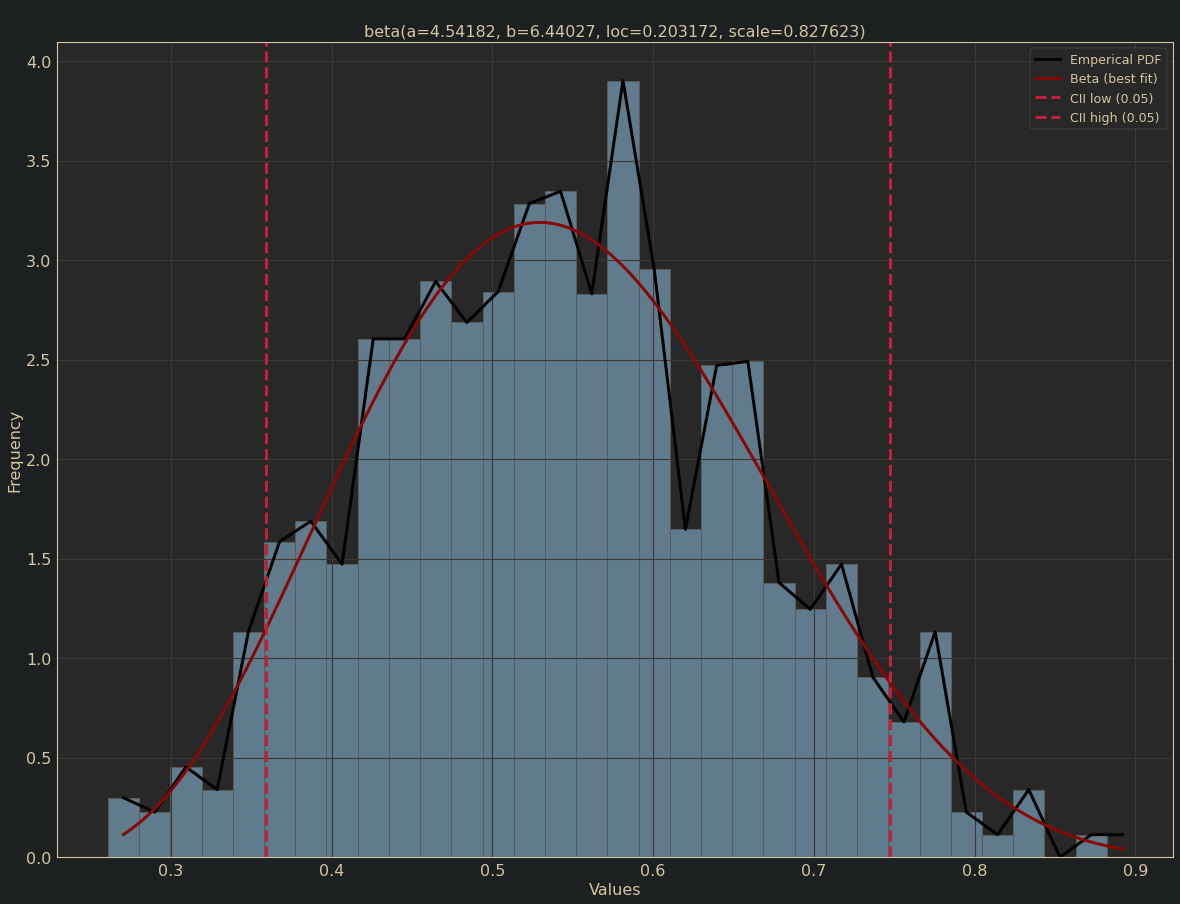

In [42]:
from distfit import distfit
dfit=distfit()
dfit.fit_transform(M['calibration_lower'])
dfit.plot()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 169.094] [loc=0.204 scale=0.045]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 215.781] [loc=0.141 scale=0.063]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 215.781] [loc=-8388607.859 scale=8388608.000]
[distfit] >INFO> [dweibull  ] [0.07 sec] [RSS: 162.125] [loc=0.203 scale=0.040]
[distfit] >INFO> [t         ] [0.27 sec] [RSS: 179.14] [loc=0.201 scale=0.039]
[distfit] >INFO> [genextreme] [0.22 sec] [RSS: 158.857] [loc=0.182 scale=0.032]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 113.067] [loc=0.137 scale=0.034]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 141.337] [loc=0.120 scale=0.072]
[distfit] >INFO> [beta      ] [0.09 sec] [RSS: 113.067] [loc=0.137 scale=5532908.735]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 499.883] [loc=0.141 scale=0.269]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 169.758] [loc=-13.943 scale

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta(a=1.98152, b=1.64155e+08, loc=0.137463, scale=5.53291e+06)'}, xlabel='Values', ylabel='Frequency'>)

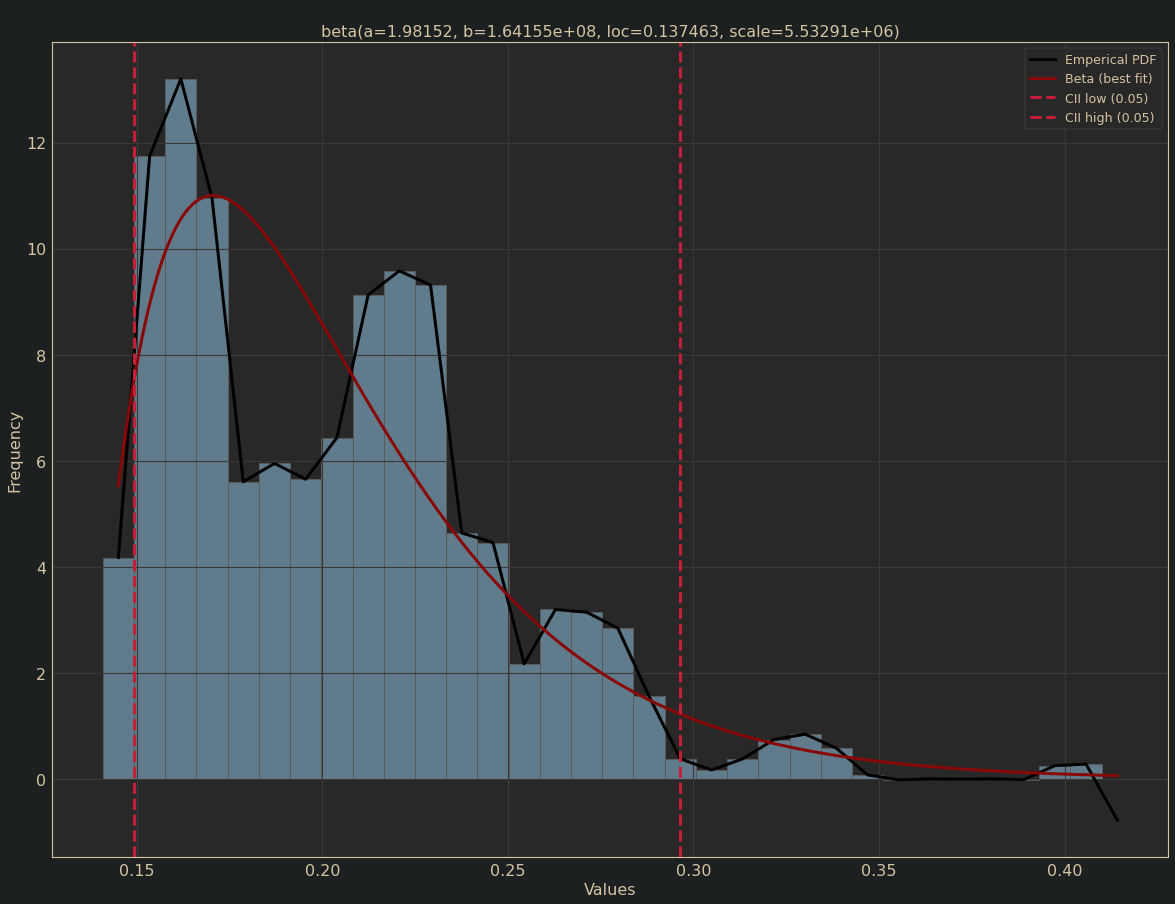

In [44]:
dfitv=distfit(smooth=3)
dfitv.fit_transform(M['calibration_veritas'])
dfitv.plot()